
Fuente de los datos de: https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset/

Archivo alojado en la carpeta raiz:


In [ ]:
import pandas as pd
#Importar el dataset alojado en google drive

from google.colab import drive
drive.mount('/content/drive')

!wget 'https://drive.google.com/uc?export=download&id=1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0' -O Datos_semana6_Cancer.csv

df = pd.read_csv('Datos_semana6_Cancer.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2023-12-05 02:28:19--  https://drive.google.com/uc?export=download&id=1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0
Resolving drive.google.com (drive.google.com)... 74.125.199.102, 74.125.199.113, 74.125.199.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pdshqq8kqqbcnb2ob6bqd90q554lpun8/1701743250000/03559725261241112129/*/1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0?e=download&uuid=af36182f-9ecc-4747-ab10-b4ecd93a3360 [following]
--2023-12-05 02:28:19--  https://doc-0g-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pdshqq8kqqbcnb2ob6bqd90q554lpun8/1701743250000/03559725261241112129/*/1VNp6srOF9wBND98nUVReoBYm6WQ-VPN0?e=download&uuid=af36182f-9ecc-4747

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Validación de datos nulos

In [ ]:
df.isna()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
678,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False


In [ ]:
df=df.dropna()
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [ ]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

Text(0.5, 1.0, 'Clasificación de tumores')

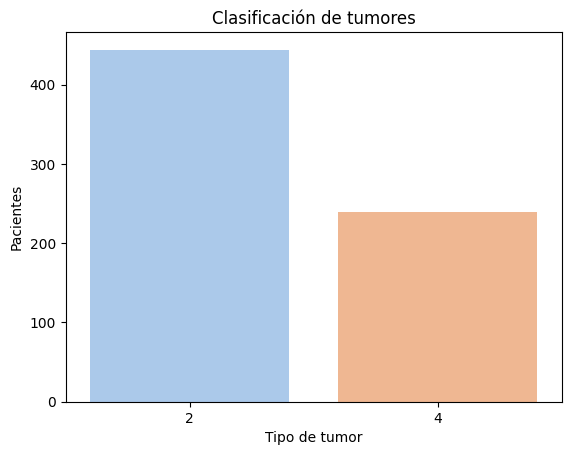

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class', data=df, label='count', palette='pastel')

# Etiquetas y título
plt.xlabel('Tipo de tumor')
plt.ylabel('Pacientes')
plt.title('Clasificación de tumores')


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()

df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.0
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,1.0
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,1.0


In [ ]:
X = df.to_numpy()[:, 0:9]
y = df.to_numpy()[:,9]
X.shape, y.shape

((683, 9), (683,))

In [ ]:
columnX = df.columns[0:9]
columnY = df.columns[9]
print(columnX, columnY)
X = df[columnX].to_numpy()
#y = df[columnY].to_numpy()
y = df['Class'].to_numpy()
X.shape, y.shape

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object') Class


((683, 9), (683,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
df_std = pd.DataFrame(X_std, columns = columnX)
df_std.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.40, random_state=0, stratify=y)

Calculo de las medias

In [ ]:
import numpy as np
numClases = np.size(np.unique(df['Class']))
mean_vectors = []
for cl in range(numClases):
    mean_vectors.append(np.mean(X_train[y_train==cl], axis=0))
    print('Vector Media clase %s: %s\n' %(cl, mean_vectors[cl]))

Vector Media clase 0: [0.21846282 0.03132832 0.05179616 0.03842941 0.12573099 0.04051796
 0.12071846 0.02548037 0.00793651]

Vector Media clase 1: [0.67210567 0.63403263 0.62548563 0.52758353 0.4965035  0.70862471
 0.57031857 0.53224553 0.18570319]



In [ ]:
numClases = np.size(np.unique(df['Class']))
probab = []
for cl in range(numClases):
    probab.append(np.size(y_train[y_train==cl])/np.size(y_train))
    print('Probabilidad clase %s: %s\n' %(cl, probab[cl]))
np.sum(probab)

Probabilidad clase 0: 0.6503667481662592

Probabilidad clase 1: 0.34963325183374083



1.0

calculamos las desviaciones tipicas de los datos

In [ ]:
import numpy as np
numClases = np.size(np.unique(df['Class']))
sds_vectors = []
for cl in range(numClases):
    sds_vectors.append(np.std(X_train[y_train==cl], axis=0))
    print('Desviación estándar clase %s: %s\n' %(cl, sds_vectors[cl]))

Desviación estándar clase 0: [0.19010805 0.08171028 0.10689483 0.10689157 0.10385558 0.14445855
 0.12091487 0.09658883 0.05434899]

Desviación estándar clase 1: [0.27321937 0.29318784 0.28203523 0.36521186 0.2698733  0.35254264
 0.24836086 0.36102369 0.28901922]



Ahora utilizo el clasificaddor de la libreria

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
tot_Test = np.size(y_test)
tot_aciertos = 0
y_pred = []
for x, y in zip(X_test, y_test):
    y_est = clf_NB.predict([x])
    y_pred.append(y_est)
    if (y==y_est): tot_aciertos +=1
    #print('Instancia %s Clase real %s - Clase estimada %s \n' %(x, y, y_est))
print('Exactitud del clasificador (porcentaje de aciertos) = %s \n' %(tot_aciertos*100/tot_Test))

Exactitud del clasificador (porcentaje de aciertos) = 94.8905109489051 



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[128   5]
 [  4  68]]


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

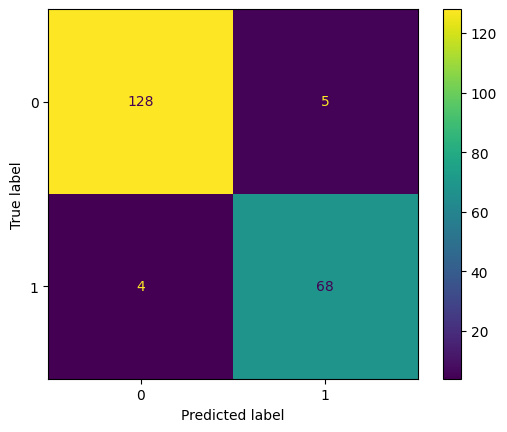

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cm_display.plot()
